Output variable -> y

y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

Attribute information For bank dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [129]:
bank=pd.read_csv('/content/bank-full.csv',sep=';')

In [130]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [131]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [132]:
bank.shape

(45211, 17)

In [133]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [134]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [135]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [136]:
#There is no Null value present in this data set and also the data types are appropriate in all attributes

In [137]:
#Correlation Matrix :

In [138]:
corr_matrix = bank.corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


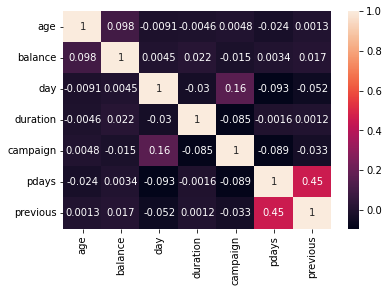

In [139]:
sns.heatmap(data = corr_matrix,annot = True)
plt.show()

In [140]:
#Perform Assumption Check:-
#Checking which attributes have good impact to predict whether the cilent has subscribed a term deposit or not.

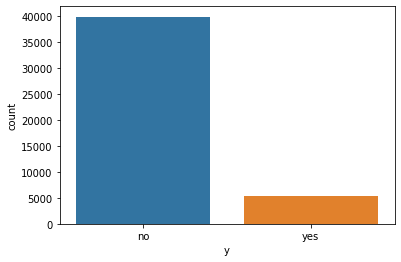

In [141]:
sns.countplot(x = 'y',data = bank)
plt.show()

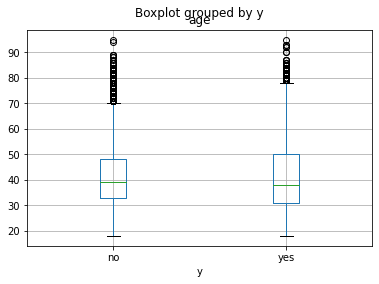

In [142]:
bank.boxplot(column = 'age',by = 'y')
plt.show()

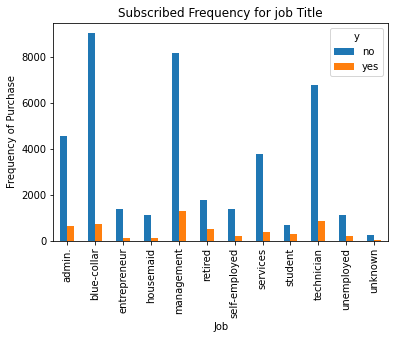

In [143]:
pd.crosstab(bank.job,bank.y).plot(kind = 'bar')

plt.title("Subscribed Frequency for job Title")
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

As per the above graph we can see that all occupation have diff types of subscriptions so it is a important features.

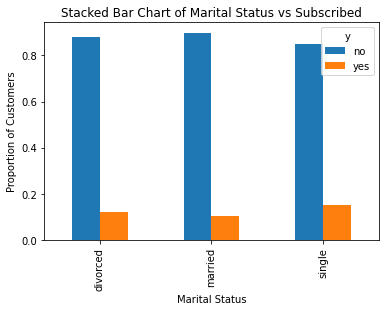

In [144]:
table1 = pd.crosstab(bank.marital,bank.y)
table1.div(table1.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)

plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

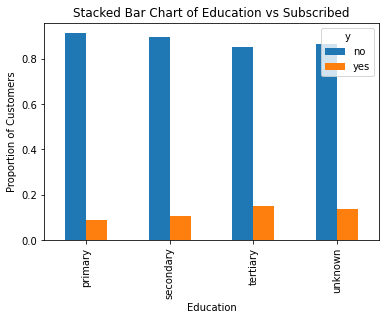

In [145]:
table2 = pd.crosstab(bank.education,bank.y)
table2.div(table2.sum(1).astype(float),axis = 0).plot(kind = 'bar')

plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

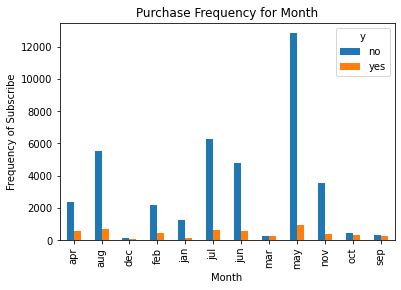

In [146]:
pd.crosstab(bank.month,bank.y).plot(kind = 'bar')

plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscribe')
plt.show()

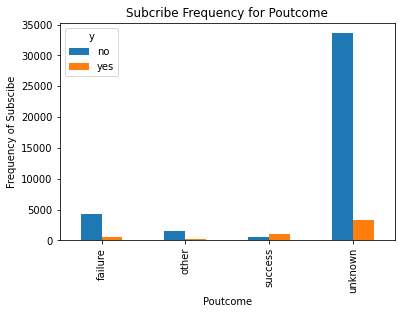

In [147]:
pd.crosstab(bank.poutcome,bank.y).plot(kind = 'bar')

plt.title('Subcribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscibe')
plt.show()

In [148]:
 #Creating Dummy Variable For Categorical Data:-

In [150]:
bank_1 = pd.read_csv('bank-full.csv',sep = ';')
bank_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [151]:
bank_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [152]:
df = pd.DataFrame(bank_1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [153]:
bank_details = df.drop(columns = ['age','marital','education','housing','loan','day','month','campaign','pdays'])
bank_details.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


In [154]:
job_dummy = pd.get_dummies(bank_details['job'],drop_first = True)
job_dummy.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [155]:
default_dummy = pd.get_dummies(bank_details['default'],drop_first = True)
default_dummy.columns

Index(['yes'], dtype='object')

In [156]:
contact_dummy = pd.get_dummies(bank_details['contact'],drop_first = True)
contact_dummy.columns

Index(['telephone', 'unknown'], dtype='object')

In [157]:
poutcome_dummy = pd.get_dummies(bank_details['poutcome'],drop_first = True)
poutcome_dummy.columns

Index(['other', 'success', 'unknown'], dtype='object')

In [158]:
# Concate the dummy varibles
concat_details = pd.concat([bank_details,job_dummy,default_dummy,contact_dummy,poutcome_dummy],axis = 1)
concat_details.head()

,job,default,balance,contact,duration,previous,poutcome,y,blue-collar,entrepreneur,...,student,technician,unemployed,unknown,yes,telephone,unknown,other,success,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,0,0,0,0,0,0,1,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,1,0,0,0,0,1,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,1,...,0,0,0,0,0,0,1,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,1,0,...,0,0,0,0,0,0,1,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,1,0,0,1,0,0,1


From the above table now drop the exist categorical columns from which we have made a dummy variables.

In [159]:
#droping categorical columns
df1 = pd.DataFrame(concat_details)
new_bank_details = df1.drop(columns = ['default','poutcome','job','contact'])
new_bank_details.head()

,balance,duration,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,...,student,technician,unemployed,unknown,yes,telephone,unknown,other,success,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,29,151,0,no,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2,76,0,no,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1506,92,0,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,198,0,no,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [160]:
 #Model Building:-

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
## Map the output variable for converting categorical to numercal data & create new dataframe
new_bank_details_1 = new_bank_details.copy()
new_bank_details_1['y'] = new_bank_details_1['y'].map({'no':0,'yes':1})
new_bank_details_1.head(3)

,balance,duration,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,...,student,technician,unemployed,unknown,yes,telephone,unknown,other,success,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,29,151,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2,76,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [177]:
#Assigning the input and output variables in x and y
X = new_bank_details_1.drop("y",axis = 1)
Y = new_bank_details_1["y"]

In [178]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [179]:
#Model Prediction

In [180]:
y_pred = classifier.predict(X)
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[0.97641645, 0.02358355],
       [0.98508035, 0.01491965],
       [0.99002917, 0.00997083],
       ...,
       [0.00853349, 0.99146651],
       [0.88229612, 0.11770388],
       [0.87907827, 0.12092173]])

In [181]:
pd.DataFrame({'actual_y':Y,'y_pred_prob':y_pred})

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [182]:
y_pred = classifier.predict(X)
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[0.97641645, 0.02358355],
       [0.98508035, 0.01491965],
       [0.99002917, 0.00997083],
       ...,
       [0.00853349, 0.99146651],
       [0.88229612, 0.11770388],
       [0.87907827, 0.12092173]])

In [183]:
pd.DataFrame({'actual_y':Y,'y_pred_prob':y_pred})

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [184]:
#Model Testing:-

In [185]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [186]:
cm = confusion_matrix = confusion_matrix(Y,y_pred)
accuracy = accuracy_score(Y,y_pred)

In [187]:
print(cm)
print('Accuracy of a Model:',accuracy)

[[39005   917]
 [ 3605  1684]]
Accuracy of a Model: 0.8999800933401163


In [188]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



In [189]:
# ROC Curve:-

In [190]:
from sklearn import preprocessing

In [191]:
label_encoder = preprocessing.LabelEncoder()

y_predict = label_encoder.fit_transform(y_pred)
y_actual = label_encoder.fit_transform(new_bank_details['y'])

In [192]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

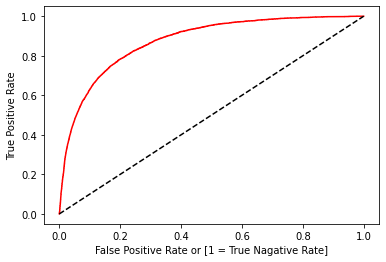

In [193]:
fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red', label = 'logit model(area = %0.2f)'%auc)

plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 = True Nagative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [194]:
print('AUC Value:',auc)

AUC Value: 0.6477134406230929


We have created a model with approprite feature and got around Accuracy of Model = 89.99% approx to 90% for prediction of client that the client will subsribe the term deposit or not.

But as per ROC curve we found that the area under curve AUC Value = 64.7% approx 65% that we can predict perfactly true positive rate.

and it is biased because our dataset has been a large frequency of negative result.

From classification table we got,

NO : 0.92, 0.98, 0.95, 39922

YES : 0.65, 0.32, 0.43, 5289

So we can say that this is average model prediction for client will be subscribed or not.